In [141]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, make_scorer
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
import xgboost as xgb
from IPython.display import display
from time import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [119]:
data = pd.read_excel('BCancer.xls')

In [120]:
print(data.shape)

data.head()

(699, 11)


,SampleCode,Thickness,Ucellsize,Ucellshape,MA,Secellsize,BN,BC,NN,Mitoses,Class
0,61634,5,4,3,1,2,0,2,3,1,2
1,63375,9,1,2,6,4,10,7,7,2,4
2,76389,10,4,7,2,2,8,6,1,1,4
3,95719,6,10,10,10,8,10,7,10,7,4
4,128059,1,1,1,1,2,5,5,1,1,2


In [121]:
data.isnull().sum()

SampleCode    0
Thickness     0
Ucellsize     0
Ucellshape    0
MA            0
Secellsize    0
BN            0
BC            0
NN            0
Mitoses       0
Class         0
dtype: int64

In [122]:
def preprocess_data(data):
    data = data.drop(columns=["SampleCode"])
    data['Class'] = data['Class'].replace([2, 4], [0,1])
    
    for col in data.columns[:-1]:
        data[col] = scale(data[col])
    
    return data

In [123]:
data = preprocess_data(data)

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [124]:
data.head()

,Thickness,Ucellsize,Ucellshape,MA,Secellsize,BN,BC,NN,Mitoses,Class
0,0.206936,0.283845,-0.069850,-0.633247,-0.549561,-0.952012,-0.590067,0.043601,-0.343912,0
1,1.628538,-0.699995,-0.406574,1.119088,0.354305,1.796673,1.461957,1.354454,0.239570,1
2,1.983939,0.283845,1.277048,-0.282780,-0.549561,1.246936,1.051552,-0.611825,-0.343912,1
3,0.562336,2.251526,2.287222,2.520955,2.162039,1.796673,1.461957,2.337594,3.156977,1
4,-1.214667,-0.699995,-0.743299,-0.633247,-0.549561,0.422330,0.641147,-0.611825,-0.343912,0


In [125]:
y = data['Class']
X = data.drop(['Class'], axis=1)

In [126]:
# pd.plotting.scatter_matrix(data[['Thickness','Ucellsize','Ucellshape','MA','Secellsize','BN','BC','NN','Mitoses']], figsize=(10,10))

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [151]:
m1 = LogisticRegression()
m2 = SVC(kernel='rbf')
m3 = DecisionTreeClassifier()
m6 = RandomForestClassifier()
m4 = AdaBoostClassifier()
m5 = xgb.XGBClassifier()

In [152]:
def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time()
    learner = learner.fit(X_train, y_train)
    end = time()
    results['train_time'] = end - start
        
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time()
    results['pred_time'] = end - start
            
    results['acc_train'] = accuracy_score(y_train, predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    results['f1_train'] = f1_score(y_train, predictions_train)         
    results['f1_test'] = f1_score(y_test, predictions_test)
    
    results['fbeta_train'] = fbeta_score(y_train, predictions_train, beta=0.5)         
    results['fbeta_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
               
    return results

In [153]:
results = {}
for model in [m1,m2,m3,m4,m5,m6]:
    model_name = model.__class__.__name__
    results[model_name] = {}
    results[model_name] = train_predict(model, X_train, y_train, X_test, y_test)
    print(results)

{'LogisticRegression': {'train_time': 0.003156900405883789, 'pred_time': 0.0007328987121582031, 'acc_train': 0.9713774597495528, 'acc_test': 0.95, 'f1_train': 0.9581151832460733, 'f1_test': 0.9292929292929293, 'fbeta_train': 0.9611344537815126, 'fbeta_test': 0.9236947791164658}}
{'LogisticRegression': {'train_time': 0.003156900405883789, 'pred_time': 0.0007328987121582031, 'acc_train': 0.9713774597495528, 'acc_test': 0.95, 'f1_train': 0.9581151832460733, 'f1_test': 0.9292929292929293, 'fbeta_train': 0.9611344537815126, 'fbeta_test': 0.9236947791164658}, 'SVC': {'train_time': 0.004296779632568359, 'pred_time': 0.0033578872680664062, 'acc_train': 0.9803220035778175, 'acc_test': 0.9571428571428572, 'f1_train': 0.9717223650385605, 'f1_test': 0.9400000000000001, 'fbeta_train': 0.9642857142857143, 'fbeta_test': 0.9288537549407112}}
{'LogisticRegression': {'train_time': 0.003156900405883789, 'pred_time': 0.0007328987121582031, 'acc_train': 0.9713774597495528, 'acc_test': 0.95, 'f1_train': 0.9

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


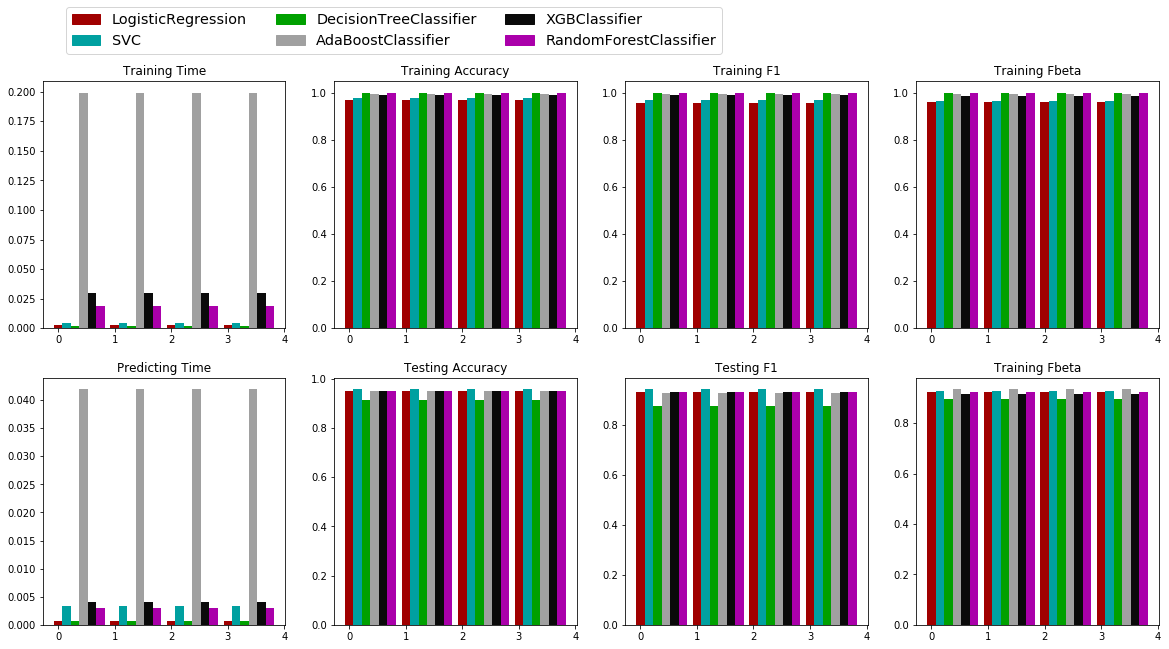

In [154]:
fig, ax = plt.subplots(2, 4, figsize=(20,10))

bar_width = 0.15
colors = ['#A00000','#00A0A0','#00A000','#A0A0A0','#0A0A0A','#AA00AA']

for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time','acc_train','f1_train','fbeta_train','pred_time','acc_test','f1_test','fbeta_test']):
            for i in np.arange(4):                
                ax[j//4, j%4].bar(i+k*bar_width,results[learner][metric],width=bar_width,color=colors[k])
                
ax[0, 0].set_title("Training Time")
ax[0, 1].set_title("Training Accuracy")
ax[0, 2].set_title("Training F1")
ax[0, 3].set_title("Training Fbeta")
ax[1, 0].set_title("Predicting Time")
ax[1, 1].set_title("Testing Accuracy")
ax[1, 2].set_title("Testing F1")
ax[1, 3].set_title("Training Fbeta")

patches = []
for i, learner in enumerate(results.keys()):
    patches.append(mpatches.Patch(color=colors[i],label=learner))
    plt.legend(handles=patches,bbox_to_anchor=(-0.8,2.5),loc='upper right',borderaxespad=0,ncol=3,fontsize='x-large')

In [162]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

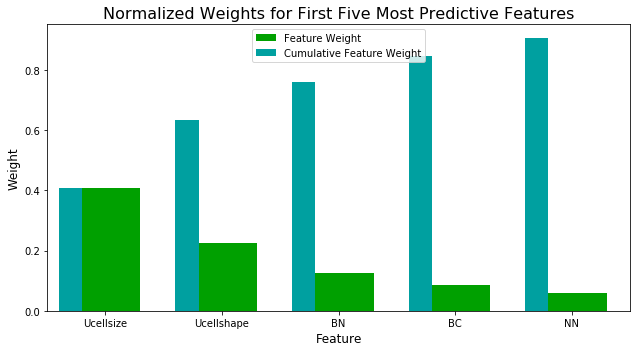

In [163]:
model = RandomForestClassifier().fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)